In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement

A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

In [2]:
# impoting dataset into the workspace 

wd = os.chdir('C:\\Users\\Rohit Yadav\\OneDrive\\Desktop\\Capstone - Files\\Restaurant Data')
countrycode = pd.read_excel('Country-Code.xlsx')
data = pd.read_excel('data.xlsx')

In [3]:
data.shape

(9551, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [5]:
data['Aggregate rating'].unique()

array([4.1, 4.6, 4.9, 4.2, 4.3, 3.7, 4. , 3.9, 4.4, 3.4, 3.2, 3.6, 3.5,
       3.8, 3.1, 3.3, 2.9, 4.7, 0. , 2.7, 4.5, 3. , 2.5, 2.6, 2.2, 2. ,
       4.8, 2.4, 2.8, 2.1, 2.3, 1.8, 1.9])

Here we can see our data sets contains some non rated/ zero rated restaurant in our datasheet

In [6]:
data.shape

(9551, 19)

In [7]:
data[data['Restaurant Name'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769


In [8]:
data.dropna(axis = 0, subset = ['Restaurant Name'],inplace = True)
data.reset_index(drop = True, inplace = True)

In [9]:
data[data['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
9082,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209
9085,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102
9093,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158
9405,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160
9493,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707
9503,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309
9532,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34
9534,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36
9538,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11


In [10]:
# now replace NaN value with orthers in the Cuisines
data['Cuisines'].fillna('other', inplace =True)

In [11]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
countrycode = pd.read_excel('Country-Code.xlsx') ## now uploading country data to the data set to merge with the restaurant data

In [13]:
countrycode.shape

(15, 2)

In [14]:
countrycode.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [15]:
df = pd.merge(data,countrycode, on = 'Country Code', how = 'inner') # now our main data is ready after merging with countru data

In [16]:
df.shape

(9550, 20)

In [17]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

from this droping col 'Longitude', 'Latitude','Currency' from our data set bcz we will work with prince range instead of currency

In [18]:
df = df.drop([ 'Longitude', 'Latitude','Currency'], axis = 1)

In [19]:
df.shape

(9550, 17)

Explore the geographical distribution of the restaurants, finding out the cities with maximum / minimum number of restaurants.
Explore how ratings are distributed overall.
Restaurant franchise is a thriving venture. So, it becomes very important to explore the franchise with most national presence.

In [20]:
dist_rest = df.groupby(['Country Code', 'Country']).agg(No_of_Rest =('Restaurant ID','count'))
dist_rest.sort_values(by = 'No_of_Rest', ascending=False)

,,No_of_Rest
Country Code,Country,
1,India,8651
216,United States,434
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


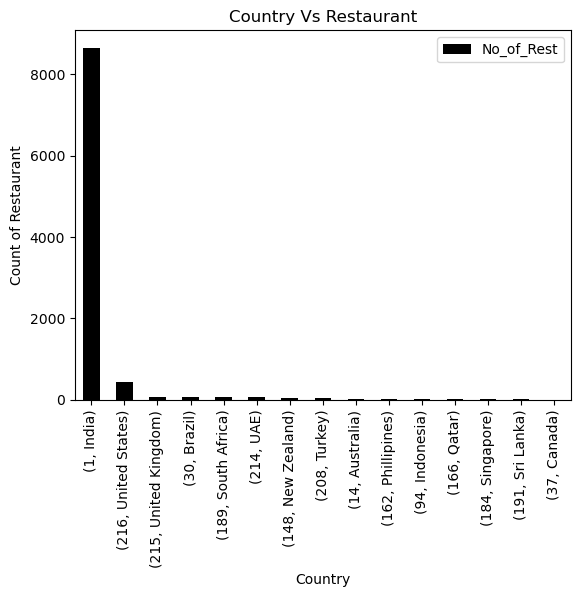

In [21]:
dist_rest.sort_values(by = 'No_of_Rest', ascending=False).plot(kind = 'bar',color ='k')
plt.title('Country Vs Restaurant')
plt.xlabel('Country')
plt.ylabel('Count of Restaurant')
plt.show()

In [22]:
country_name = df.Country.value_counts().index
country_value = df.Country.value_counts().values
print(country_value)
print(country_name)

[8651  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]
Index(['India', 'United States', 'United Kingdom', 'South Africa', 'UAE',
       'Brazil', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Sri Lanka', 'Qatar', 'Singapore', 'Canada'],
      dtype='object')


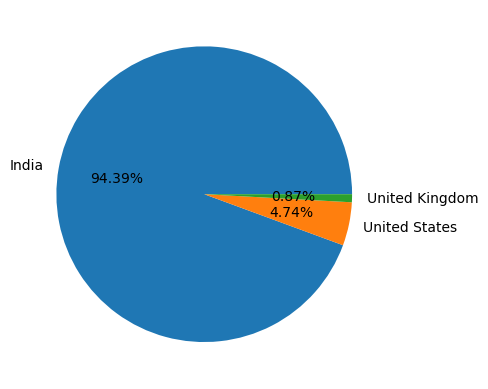

In [23]:
plt.pie(country_value[:3], labels = country_name[:3],autopct='%1.2f%%')
plt.show()

Conclusions :
    1. The maximum records for this data sheet are from India after that USA and very minimum data from UK

Conclusion : India has the highest no. of restaurant and canada has the lowest no of restaurant as per the data our top two country are India and US.

In [24]:
dist_rest_city = df.groupby(['Country','City']).agg(No_of_Rest =('Restaurant ID','count'))
dist_rest_city.sort_values(by = 'No_of_Rest', ascending=False)

No_of_Rest
Country       City                      
India         New Delhi             5473
              Gurgaon               1118
              Noida                 1080
              Faridabad              251
              Ghaziabad               25
...                                  ...
              Panchkula                1
Australia     Balingup                 1
Indonesia     Bandung                  1
Phillipines   Quezon City              1
United States Winchester Bay           1

[141 rows x 1 columns]

In [25]:
## city with single restaurant present
city_with_single_rest = dist_rest_city[dist_rest_city['No_of_Rest']==1]
city_with_single_rest

No_of_Rest
Country       City                        
Australia     Armidale                   1
              Balingup                   1
              Beechworth                 1
              Dicky Beach                1
              East Ballina               1
              Flaxton                    1
              Forrest                    1
              Huskisson                  1
              Inverloch                  1
              Lakes Entrance             1
              Lorn                       1
              Macedon                    1
              Mayfield                   1
              Middleton Beach            1
              Montville                  1
              Palm Cove                  1
              Paynesville                1
              Penola                     1
              Phillip Island             1
              Tanunda                    1
              Trentham East              1
              Victor Harbor              1
Canada        Chatham-Kent               1
              Consort                    1
              Vineland Station           1
              Yorkton                    1
India         Mohali                     1
              Panchkula                  1
Indonesia     Bandung                    1
Phillipines   Quezon City                1
              Tagaytay City              1
South Africa  Randburg                   1
United States Clatskanie                 1
              Cochrane                   1
              Fernley                    1
              Lakeview                   1
              Lincoln                    1
              Mc Millan                  1
              Miller                     1
              Monroe                     1
              Ojo Caliente               1
              Potrero                    1
              Princeton                  1
              Vernonia                   1
              Weirton                    1
              Winchester Bay             1

In [26]:
city_rest = df.groupby('City')['Restaurant ID'].size().reset_index()

city_rest

In [27]:
city_rest_sorted = city_rest.sort_values('Restaurant ID', ascending=False)
top_five_cities = city_rest_sorted.head(5)

In [28]:
top_five_cities

,City,Restaurant ID
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25


Conclusion:Top five cities with highest no. of restaurant are from India

In [29]:
franch_dist = df.groupby(['Restaurant Name','Country']).agg(Count = ('Country','count'))
francise = franch_dist.sort_values(by='Count',ascending=False)

In [30]:
top_twenty_Rest = francise.head(20)

In [31]:
top_twenty_Rest

,,Count
Restaurant Name,Country,
Cafe Coffee Day,India,83
Domino's Pizza,India,79
Subway,India,63
Green Chick Chop,India,51
McDonald's,India,48
Keventers,India,34
Pizza Hut,India,29
Giani,India,29
Baskin Robbins,India,28


Conclusion : 
1. Cafe Coffee Day has the highest no of outlet in India
2.Highest no of franchise of the top 20 restaurant has present in India.

In [32]:
df_US = df[df['Country']=='United States']
franch_dist = df_US.groupby(['Restaurant Name','Country']).agg(Count = ('Country','count'))
francise = franch_dist.sort_values(by='Count',ascending=False)
top_twenty_cities = francise.head(10)
top_twenty_cities

,,Count
Restaurant Name,Country,
Texas Roadhouse,United States,4
HuHot Mongolian Grill,United States,3
Granite City Food & Brewery,United States,2
Chick-fil-A,United States,2
Mellow Mushroom,United States,2
Rhinehart's Oyster Bar,United States,2
Los Agaves,United States,2
Ceviche Tapas Bar & Restaurant,United States,2
Passage 2 India,United States,1


Top 10 restaurant in US 

### Explore how ratings are distributed overall.

In [33]:
rating =df.groupby([ 'Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Count'})

In [34]:
rating

,Aggregate rating,Rating color,Rating text,Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Conclusion : 
            
             1.When Rating is between 4.5 to 4.9 ------ Excellent
             
             2.When Rating is between 4.0 to 4.4 ------ Very Good
             
             3.When Rating is between 3.5 to 3.9 ------ Good
             
             4.When Rating is between 2.5 to 3.4 ------ Avg
             
             5.When Rating is between 2.0 to 2.4 ------ poor

In [35]:
# Countries which have highest no of not rated the restaurant

In [36]:
Country_not_rated = df[df['Aggregate rating']== 0.0].groupby('Country').size().reset_index()

In [37]:
Country_not_rated

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Conclusion : India has the highest no. of non rated restaurants.


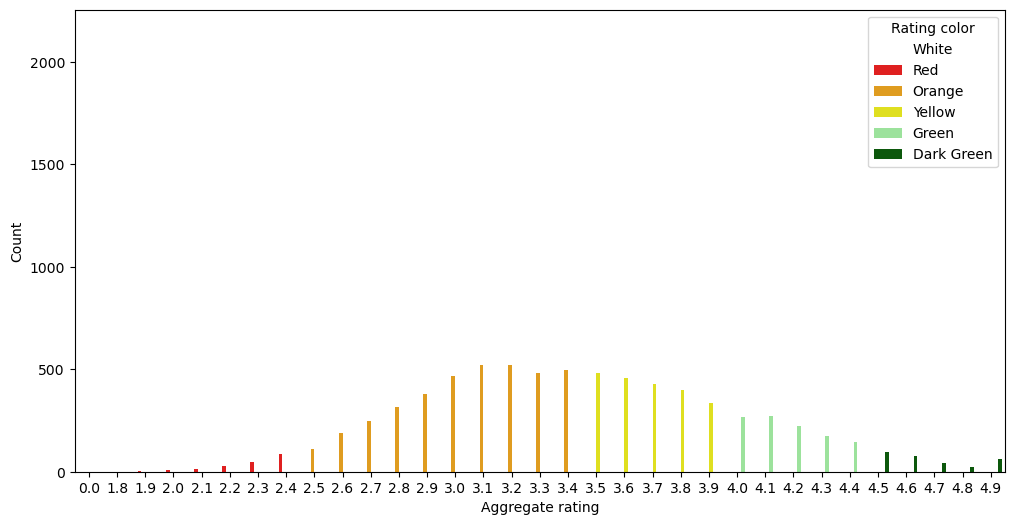

In [38]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating', y ='Count', data = rating, hue = 'Rating color', palette=['white','red','orange','yellow','lightgreen','darkgreen'])
plt.show()

Conclusion : Our maximum rating is between 2.5 to 3.1 for the data set whose rating color pallete says average.

In [39]:
# Maximum rated restaurant with respect to their city

max_rated_restaurants = df.groupby('Country')['Aggregate rating'].idxmax()
result = df.loc[max_rated_restaurants, ['Country','City', 'Restaurant Name', 'Aggregate rating']]
result

,Country,City,Restaurant Name,Aggregate rating
9096,Australia,Beechworth,Bridge Road Brewers,4.6
8885,Brazil,BrasÌ_lia,Coco Bambu,4.9
9546,Canada,Vineland Station,Lake House Restaurant,4.3
33,India,New Delhi,Masala Library,4.9
2,Indonesia,Jakarta,Sushi Masa,4.9
9071,New Zealand,Auckland,Milse,4.9
8672,Phillipines,Pasay City,Spiral - Sofitel Philippine Plaza Manila,4.9
8779,Qatar,Doha,Mainland China Restaurant,4.9
8813,Singapore,Singapore,Al'frank Cookies,4.2
8714,South Africa,Pretoria,Restaurant Mosaic @ The Orient,4.9


conclusion:  As we can see all the top restaurant are in excellent category above 4.0 rating

In [40]:
min_rated_restaurants = df.groupby('Country')['Aggregate rating'].idxmin()
result = df.loc[min_rated_restaurants, ['Country','City', 'Restaurant Name', 'Aggregate rating','Rating color']]
result

,Country,City,Restaurant Name,Aggregate rating,Rating color
9091,Australia,Montville,Poets Cafe,2.4,Red
8917,Brazil,Rio de Janeiro,Quiosque Chopp Brahma,0.0,White
9548,Canada,Consort,Consort Restaurant,3.0,Orange
109,India,New Delhi,Playboy Club,0.0,White
18,Indonesia,Jakarta,Fish Streat,3.4,Orange
9053,New Zealand,Auckland,De Fontein Belgian Beer Cafe,2.3,Red
8691,Phillipines,Santa Rosa,Cafe Arabelle,3.6,Yellow
8786,Qatar,Doha,7st by Mumbai Spices,3.4,Orange
8812,Singapore,Singapore,Makansutra Gluttons Bay,3.0,Orange
8768,South Africa,Pretoria,Parrot's,3.4,Orange


colclusion: we can see India, Uk , USA & Brazil has unrated restaurant at their min rated or least rated restaurant

In [41]:
## finding the restaurant which is present across multiple countries

common_rest = df.groupby('Restaurant Name')['Country'].nunique()
Franchise_multi_country = common_rest.sort_values(ascending = False)
Franchise_multi_country.head(5)

Restaurant Name
Hard Rock Cafe         3
Punjab Restaurant      2
Indian Coffee House    2
The National           2
Nando's                2
Name: Country, dtype: int64

Conclusion : Hard rock cafe has the highest no. of francise presence 

In [42]:
Hard_rock_cafe_country = df[df['Restaurant Name']== 'Hard Rock Cafe'].groupby('Country').size().reset_index()
Hard_rock_cafe_country 

,Country,0
0,India,1
1,UAE,1
2,United Kingdom,1


Conclusion : Hard rock cafe is present into the three major country of the data sheet.

What is the percentage of restaurants providing online delivery?
Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

In [43]:
online_table_booking = df[df['Has Table booking']== 'Yes'].groupby('Country').size().reset_index()

In [44]:
online_table_booking

,Country,0
0,India,1111
1,Phillipines,14
2,Qatar,1
3,South Africa,2
4,UAE,18
5,United Kingdom,12


Conclusion : India has the higest no of restaurant with option of online booking and then UAE then UK

What is the ratio between restaurants that allow table booking vs that do not allow table booking?
What is the percentage of restaurants providing online delivery?
Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

In [45]:
table_booking = df['Has Table booking'].value_counts()
table_booking_yes = table_booking['Yes'] ## Restaurant who has online table booking
table_booking_no = table_booking['No']   ## Restaurant who doesnt have online table booking
ratio_table_booking = table_booking_yes / table_booking_no #ratio
print("The ratio between restaurants that allow table booking vs that do not allow table booking : ", ratio_table_booking )

The ratio between restaurants that allow table booking vs that do not allow table booking :  0.13798856053384176


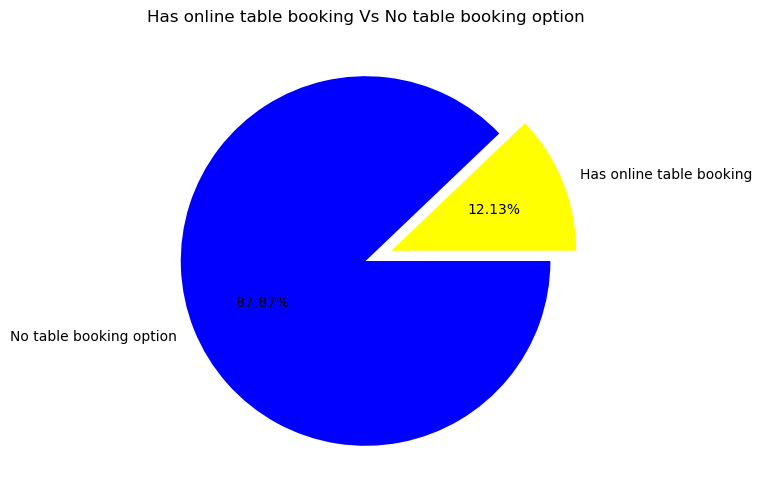

In [46]:
## ploting pie chart for visualising
Label = ["Has online table booking", "No table booking option"]
data =[table_booking_yes,table_booking_no]
explode = (0.15,0)
color = ('yellow','blue')
plt.title("Has online table booking Vs No table booking option")
plt.pie(data, labels=Label, colors=color, explode=explode, autopct='%1.2f%%')
plt.show()

In [47]:
online_delivery = df[df['Has Online delivery']== 'Yes'].groupby('Country').size().reset_index()
online_delivery

,Country,0
0,India,2423
1,UAE,28


colclusion : India and UAE are the only countries with online delivery option

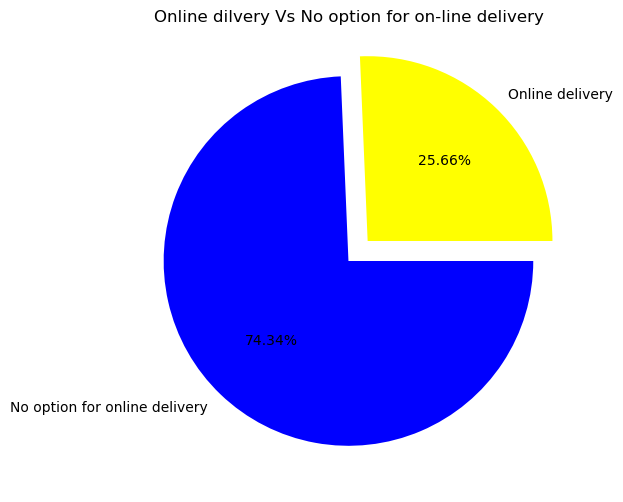

In [48]:
online_delivery_d = df['Has Online delivery'].value_counts()
online_delivery_yes = online_delivery_d['Yes']
online_delivery_no =  online_delivery_d['No']

Label2 = ["Online delivery", "No option for online delivery"]
data2 =[online_delivery_yes,online_delivery_no]
explode = (0.15,0)
color2 = ('yellow','blue')
plt.title('Online dilvery Vs No option for on-line delivery')

plt.pie(data2, labels=Label2, colors=color2, explode=explode, autopct='%1.2f%%')
plt.show()

Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

In [49]:
## Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?
import scipy.stats as stats
online_delivery = df[df['Has Online delivery'] == 'Yes']
non_online_delivery = df[df['Has Online delivery'] == 'No']

mean_online_delivery = online_delivery['Votes'].mean()
mean_non_online_delivery = non_online_delivery['Votes'].mean()

diff_of_votes = (mean_online_delivery - mean_non_online_delivery)
print('The mean difference between votes are : ' , diff_of_votes )

The mean difference between votes are :  73.26496206906242


In [50]:
cuisines_df = df['Cuisines'].str.split(',', expand=True).stack().reset_index(level = 1,drop=True).rename('Cuisine')
cuisine_city_df = pd.merge(cuisines_df,df['City'], left_index=True, right_index=True)
top_cuisines = cuisine_city_df.groupby(['City', 'Cuisine']).size().reset_index(name='Count')
top_cuisines = top_cuisines.sort_values(by='Count', ascending=False)
top_10_cuisines = top_cuisines.head(10)
top_10_cuisines

,City,Cuisine,Count
1621,New Delhi,North Indian,1848
1516,New Delhi,Chinese,1069
1521,New Delhi,Fast Food,858
1553,New Delhi,North Indian,577
1588,New Delhi,Chinese,569
1549,New Delhi,Mughlai,467
1594,New Delhi,Fast Food,446
1711,Noida,North Indian,433
1579,New Delhi,Bakery,397
994,Gurgaon,North Indian,367


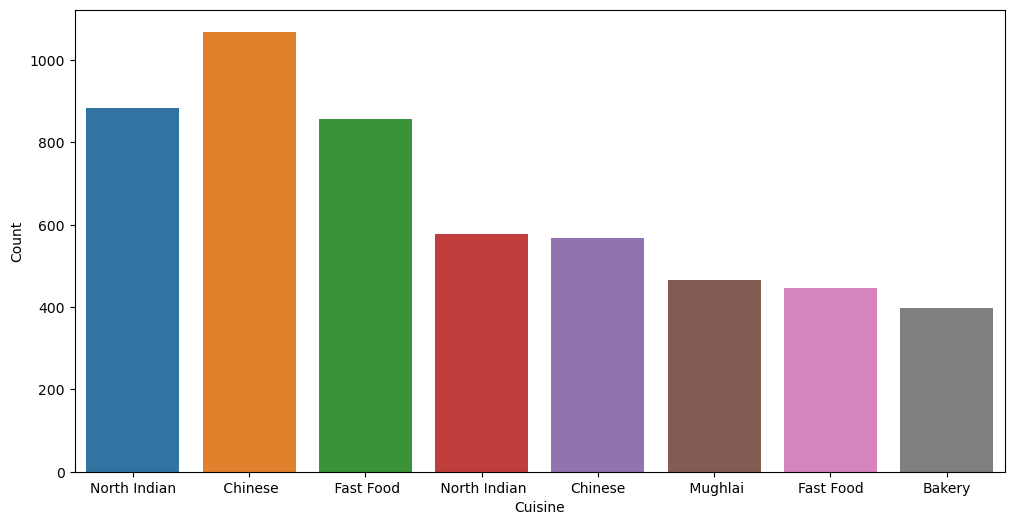

In [51]:
topcuisine = top_10_cuisines['Cuisine']
count  = top_10_cuisines['Count']
city = top_10_cuisines['City']

sns.barplot(x=topcuisine, y= count,
            data = top_10_cuisines, errorbar=None)
plt.show()

In [52]:
# Split the 'Cuisines' column by comma and calculate the number of cuisines for each restaurant
df['Num_Cuisines'] = df['Cuisines'].str.split(',').apply(lambda x: len(x))

# Find the maximum and minimum number of cuisines served
max_cuisines = df['Num_Cuisines'].max()
min_cuisines = df['Num_Cuisines'].min()

print("Maximum number of cuisines served by a restaurant:", max_cuisines)
print("Minimum number of cuisines served by a restaurant:", min_cuisines)


Maximum number of cuisines served by a restaurant: 8
Minimum number of cuisines served by a restaurant: 1


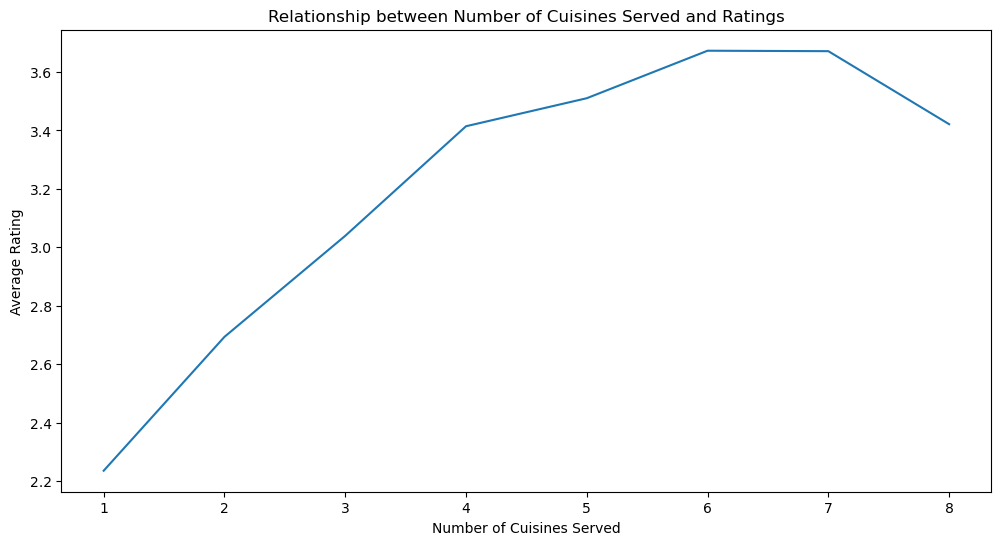

In [53]:

# Calculate the average rating for each number of cuisines served
avg_rating_by_cuisines = df.groupby('Num_Cuisines')['Aggregate rating'].mean()

# Creating a line plot to visualize the relationship
plt.plot(avg_rating_by_cuisines.index, avg_rating_by_cuisines.values)
plt.xlabel('Number of Cuisines Served')
plt.ylabel('Average Rating')
plt.title('Relationship between Number of Cuisines Served and Ratings')
plt.show()


## Discuss the cost vs the other variables.

In [54]:
df_relation = df.copy()

In [55]:
df_relation['Has Online delivery'] =df_relation['Has Online delivery'].map({'Yes':1, 'No':0})
df_relation['Has Table booking'] =df_relation['Has Table booking'].map({'Yes':1, 'No':0})
df_relation.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Num_Cuisines
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta","Italian, Continental",800000,0,0,3,4.1,Green,Very Good,1498,Indonesia,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta","Asian, Indonesian, Western",800000,0,0,3,4.6,Dark Green,Excellent,873,Indonesia,3
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta","Sushi, Japanese",500000,0,0,3,4.9,Dark Green,Excellent,605,Indonesia,2
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",Japanese,450000,0,0,3,4.2,Green,Very Good,395,Indonesia,1
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta","French, Western",350000,0,0,3,4.3,Green,Very Good,243,Indonesia,2


In [56]:
df_relation.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'Num_Cuisines'],
      dtype='object')

In [57]:
df_cor = df_relation[['Restaurant ID', 'Country Code', 
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating',  'Votes',
       'Num_Cuisines']]

In [58]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9550 entries, 0 to 9549
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant ID        9550 non-null   int64  
 1   Country Code         9550 non-null   int64  
 2   Has Table booking    9550 non-null   int64  
 3   Has Online delivery  9550 non-null   int64  
 4   Price range          9550 non-null   int64  
 5   Aggregate rating     9550 non-null   float64
 6   Votes                9550 non-null   int64  
 7   Num_Cuisines         9550 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 929.5 KB


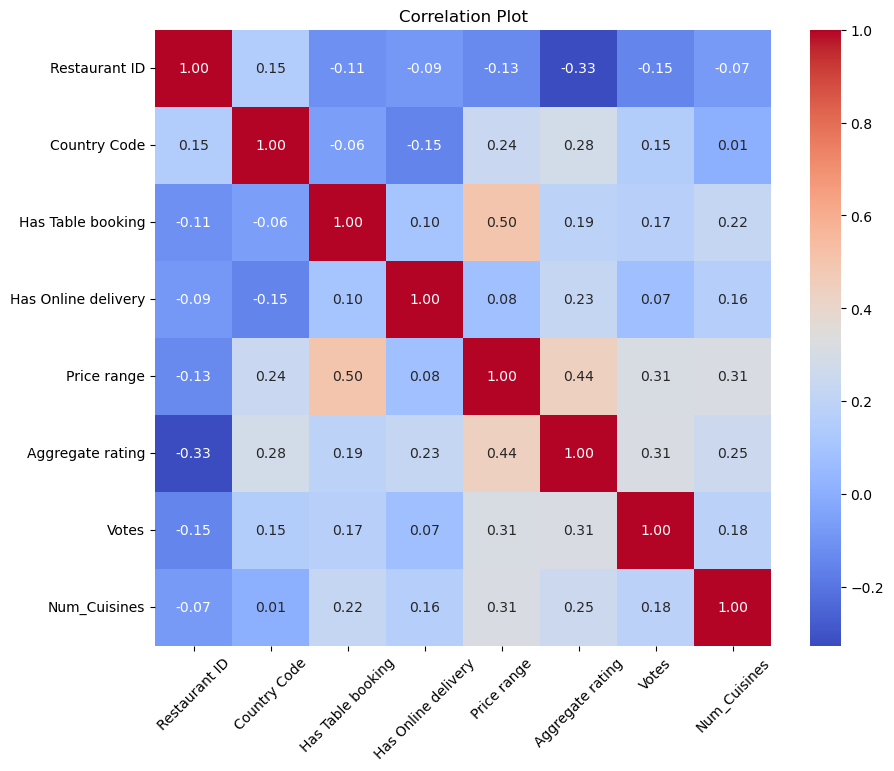

In [59]:
correlation_matrix = df_cor.corr()

# Create a correlation plot with feature names
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Conclusion : as per the correlatiopn plot cost or price range has good relation ship with aggreate rating and have an online table booking option

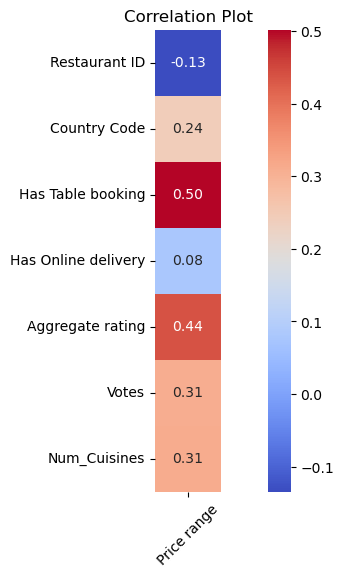

In [60]:
price_correlation = df_cor.corr()['Price range'].drop('Price range')
sns.heatmap(price_correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Plot')
plt.xticks(rotation=45)
plt.show()

### The factors which effect price are Num of Cuisines, Votes, Aggregate rating and has online table booking options

## Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.
## All the information gathered here will lead to a better understanding of the data and allow for a better implementation of ML models.

 

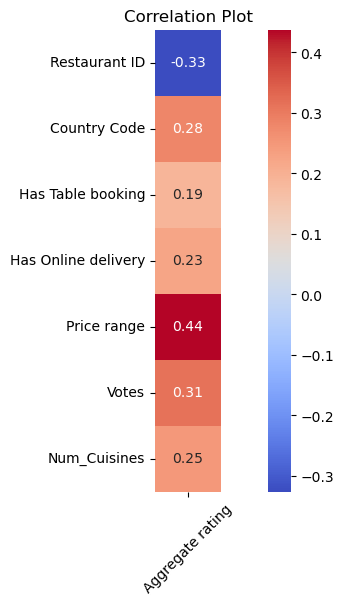

In [69]:
price_correlation = df_cor.corr()['Aggregate rating'].drop('Aggregate rating')
sns.heatmap(price_correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Plot')
plt.xticks(rotation=45)
plt.show()

Final Conclusion:
Based on the analysis of our dataset, we have found that the majority of the data is from India, and the top 10 cuisines are predominantly from Indian restaurants and cities.

Furthermore, after examining the factors that may affect the ratings, we observed the following:

Price Range: The price range of a restaurant has a significant impact on its rating.

Number of Cuisines: The variety of cuisines offered by a restaurant also influences its rating. Restaurants offering a greater number of cuisines tend to have higher ratings.

Votes: The number of votes a restaurant receives is positively correlated with its rating. Restaurants with a higher number of votes generally have higher ratings.

On the other hand, we found that factors like online table booking do not have a significant impact on the ratings.